## Final Project ##

loading the data

pip install datasets

In [12]:
import pandas as pd
from datasets import load_dataset

# Replace "Saba06huggingface/resume_dataset" 
resumes = pd.read_csv("data/resume.csv")

# splits = {'train': 'train_dataset.json', 'validation': 'val_dataset.json', 'test': 'test_dataset.json'}
# df = pd.read_json("hf://datasets/Saba06huggingface/resume_dataset/" + splits["train"], lines=True)

print(resumes.columns)

# job descirption data set form data folder
job_descriptions = pd.read_csv("data/jb_df.csv")

print(job_descriptions.columns)



Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')
Index(['Job Title', 'Role', 'Job Description'], dtype='object')


explore the data

In [16]:
print(resumes.head())
print()
print(job_descriptions.head())

         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  

                  Job Title                          Role  \
0       Procurement Manager    Supplier Diversity Manager   
1    Architectural Designer         Architectural Drafter   
2               Art Teacher     Art

In [17]:
print(resumes.isnull().sum())
print()
print(job_descriptions.isnull().sum())

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

Job Title          0
Role               0
Job Description    0
dtype: int64


In [18]:
print(resumes.shape)
print(resumes.info())
print()
print(job_descriptions.shape)
print(job_descriptions.info())

(2484, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
None

(200000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Job Title        200000 non-null  object
 1   Role             200000 non-null  object
 2   Job Description  200000 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB
None


In [24]:
print(resumes['Category'].value_counts())
print()
# print the total number of resumes
print("total number of resumes", resumes['Category'].value_counts().sum())

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

total number of resumes 2484


In [20]:
resumes['resume_length'] = resumes['Resume_str'].apply(lambda x: len(x.split()))
job_descriptions['job_desc_length'] = job_descriptions['Job Description'].apply(lambda x: len(x.split()))

print(resumes['resume_length'].describe())
print(job_descriptions['job_desc_length'].describe())

count    2484.000000
mean      811.325684
std       371.006906
min         0.000000
25%       651.000000
50%       757.000000
75%       933.000000
max      5190.000000
Name: resume_length, dtype: float64
count    200000.000000
mean         24.195915
std           7.473316
min          10.000000
25%          19.000000
50%          24.000000
75%          28.000000
max          62.000000
Name: job_desc_length, dtype: float64


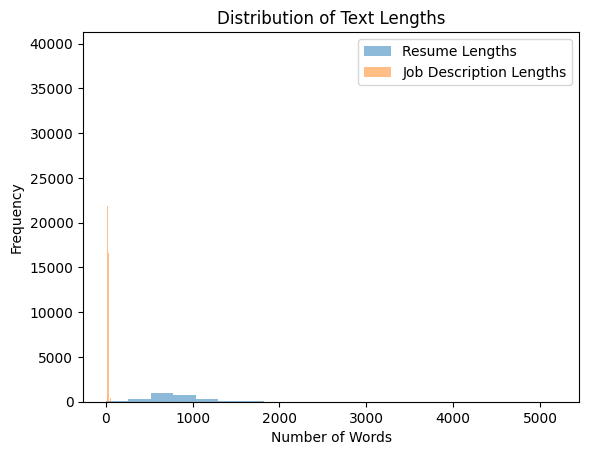

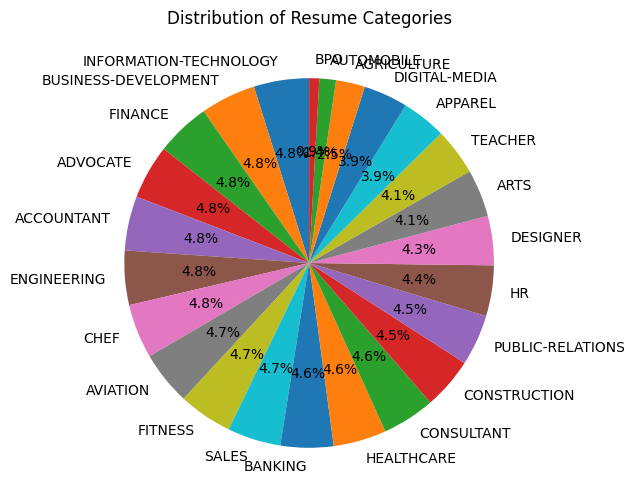

In [25]:
import matplotlib.pyplot as plt

# Calculate the frequency of each category
category_counts = resumes['Category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Resume Categories')
plt.show()